<a href="https://colab.research.google.com/github/stephkmilonas/public/blob/main/CS625_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephanie Milonas

CS 625 

HW 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Part 1

Use dataset 1 to create a chart to answer the question, "How has the weekly rate of COVID-19 cases in Virginia changed over time based on vaccination status?". (Though I'll use cases here, you may show cases, hospitalizations, or deaths.)

In [2]:
df1 = pd.read_csv("./VDH-COVID-19-PublicUseDataset-Cases-by-Vaccination-Status.csv")
df1.head()

,Report Date,Week Ending Date,Health Region,Vaccination Status,Infections,Hospitalizations,Deaths,Population Denominator
0,01/14/2022,01/01/2022,Central Region,Unvaccinated,16650,51,13,1973230
1,01/14/2022,04/10/2021,Southwest Region,Partially Vaccinated,94,16,3,1305740
2,01/14/2022,11/20/2021,Southwest Region,Partially Vaccinated,146,7,6,761876
3,01/14/2022,11/27/2021,Eastern Region,Unvaccinated,1225,52,21,2254822
4,01/14/2022,03/13/2021,Southwest Region,Partially Vaccinated,107,13,3,782207


In [9]:
df1['Health Region'].unique()

array(['Central Region', 'Southwest Region', 'Eastern Region',
       'Northwest Region', 'Northern Region'], dtype=object)

In [3]:
df1['Vaccination Status'].unique()

array(['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated'],
      dtype=object)

In [4]:
df1['Week Ending Date'] = pd.to_datetime(df1['Week Ending Date'])

In [5]:
df_un = df1[df1['Vaccination Status'] == 'Unvaccinated']
df_un = df_un.groupby(['Week Ending Date'], as_index=False).sum()
df_un['death_rate_per_100k'] = (df_un['Deaths'] / df_un['Population Denominator']) * 100000

df_part = df1[df1['Vaccination Status'] == 'Partially Vaccinated']
df_part = df_part.groupby(['Week Ending Date'], as_index=False).sum()
df_part['death_rate_per_100k'] = (df_part['Deaths'] / df_part['Population Denominator']) * 100000

df_full = df1[df1['Vaccination Status'] == 'Fully Vaccinated']
df_full = df_full.groupby(['Week Ending Date'], as_index=False).sum()
df_full['death_rate_per_100k'] = (df_full['Deaths'] / df_full['Population Denominator']) * 100000

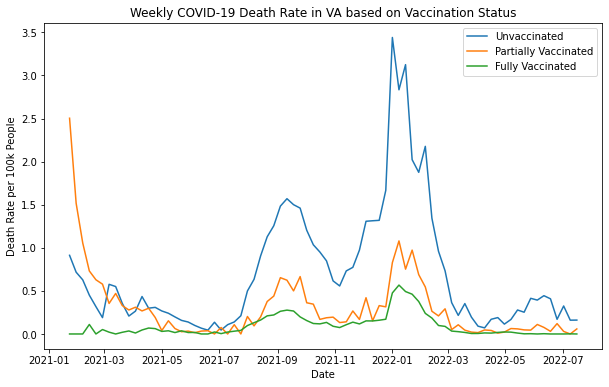

In [8]:
x1 = df_un['Week Ending Date']
y1 = df_un['death_rate_per_100k']

x2 = df_part['Week Ending Date']
y2 = df_part['death_rate_per_100k']

x3 = df_full['Week Ending Date']
y3 = df_full['death_rate_per_100k']

plt.figure(figsize=(10,6))
plt.plot(x1, y1, label='Unvaccinated')
plt.plot(x2, y2, label='Partially Vaccinated')
plt.plot(x3, y3, label='Fully Vaccinated')
plt.title('Weekly COVID-19 Death Rate in VA based on Vaccination Status')
plt.ylabel('Death Rate per 100k People')
plt.xlabel('Date')
plt.legend(loc="upper right")
# Weekplt.savefig('LineChart.png')
plt.show()

### Part 2

Use dataset 2 to create a chart to answer the question, "For each health district in Virginia, what proportion of all 1st doses were of the Pfizer vaccine?". 

Remove or ignore the "health districts" labeled "Out of State" and "Not Reported".


In [ ]:
df2 = pd.read_csv("./VDH-COVID-19-PublicUseDataset-Vaccines-DosesAdministered.csv")
df2.head()

,Administration Date,FIPS,Locality,Health District,Facility Type,Vaccine Manufacturer,Dose Number,Vaccine Doses Administered Count
0,NaN,Not Reported,Not Reported,Not Reported,Federal Doses,Non-Specified,1,378385
1,03/14/2021,51161,Roanoke County,Alleghany,Hospitals,AstraZeneca,1,1
2,03/20/2021,51003,Albemarle,Blue Ridge,Hospitals,AstraZeneca,1,1
3,03/09/2021,51678,Lexington,Central Shenandoah,Hospitals,AstraZeneca,1,1
4,03/10/2021,51510,Alexandria,Alexandria,Hospitals,J&J,1,3


In [ ]:
len(df2)

1033534

In [ ]:
df2.drop(df2[df2['Health District'] == 'Out of State'].index, inplace=True)
df2.drop(df2[df2['Health District'] == 'Not Reported'].index, inplace=True)

In [ ]:
len(df2)

990605

In [ ]:
df2.to_csv('data2.csv', index=False)